# Analysis: Arrests By Population

Workflow: 3 <br>
Goal: Run analysis on arrest / population ratio. <br>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import crime_helper as ch

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_colwidth', -1)

## Initial Setup

In [3]:
ARREST_FILE = 'data/arrest_tkm_state.csv'
EMPLOYMENT_FILE = 'data/employment_state.csv'
OFFENDER_FILE = 'data/offender_tkm_state.csv'
OFFENSE_FILE = 'data/offense_tkm_state.csv'
VICTIM_FILE = 'data/victim_tkm_state.csv'
STATE_FILE = 'data/lookup_state.csv'
REGION_FILE = 'data/lookup_region.csv'

In [4]:
state_df = pd.read_csv(STATE_FILE)
state_df.head()
state_df.info()

,region_code,state_abbr,state_fips_code,state_id,state_name
0,4,AK,2.0,1,Alaska
1,3,AL,1.0,2,Alabama
2,3,AR,5.0,3,Arkansas
3,99,AS,60.0,4,American Samoa
4,4,AZ,4.0,5,Arizona


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
region_code        58 non-null int64
state_abbr         58 non-null object
state_fips_code    57 non-null float64
state_id           58 non-null int64
state_name         58 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ KB


In [5]:
region_df = pd.read_csv(REGION_FILE)
region_df

,region_code,region_desc,region_name
0,0,U.S. Territories,U.S. Territories
1,1,Region I,Northeast
2,2,Region II,Midwest
3,3,Region III,South
4,4,Region IV,West
5,99,Other,Other


In [6]:
state_full_df = pd.merge(state_df, region_df, how='inner', on='region_code')
state_full_df.head()

,region_code,state_abbr,state_fips_code,state_id,state_name,region_desc,region_name
0,4,AK,2.0,1,Alaska,Region IV,West
1,4,AZ,4.0,5,Arizona,Region IV,West
2,4,CA,6.0,6,California,Region IV,West
3,4,CO,8.0,7,Colorado,Region IV,West
4,4,HI,15.0,15,Hawaii,Region IV,West


In [7]:
state_clean_df = state_full_df.sort_values('state_abbr').reset_index()
state_clean_df = state_clean_df[['state_abbr', 'state_name', 'region_code', 'region_name']]
state_clean_df.head(10)
state_clean_df.info()

,state_abbr,state_name,region_code,region_name
0,AK,Alaska,4,West
1,AL,Alabama,3,South
2,AR,Arkansas,3,South
3,AS,American Samoa,99,Other
4,AZ,Arizona,4,West
5,CA,California,4,West
6,CO,Colorado,4,West
7,CT,Connecticut,1,Northeast
8,CZ,Canal Zone,99,Other
9,DC,District of Columbia,3,South


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
state_abbr     58 non-null object
state_name     58 non-null object
region_code    58 non-null int64
region_name    58 non-null object
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


## Explore Arrests

In [8]:
arrest_df = pd.read_csv(ARREST_FILE)
arrest_df = arrest_df.rename(columns={'count': 'arrests'})
arrest_df.head()
arrest_df.info()

,state,year,gender,offense,arrests
0,AK,2000,female,aggravated-assault,194
1,AK,2000,female,arson,3
2,AK,2000,female,burglary,49
3,AK,2000,female,curfew,1
4,AK,2000,female,disorderly-conduct,221


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51102 entries, 0 to 51101
Data columns (total 5 columns):
state      51102 non-null object
year       51102 non-null int64
gender     51102 non-null object
offense    51102 non-null object
arrests    51102 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [20]:
arrest_total_df = arrest_df.groupby(['state', 'year']).sum().sort_values(['state', 'year'])
arrest_total_df = arrest_total_df.reset_index()
arrest_total_df.head()
arrest_total_df.info()

,state,year,arrests
0,AK,2000,21354
1,AK,2001,20267
2,AK,2002,19818
3,AK,2003,22746
4,AK,2004,21027


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 3 columns):
state      952 non-null object
year       952 non-null int64
arrests    952 non-null int64
dtypes: int64(2), object(1)
memory usage: 22.4+ KB


In [21]:
arrest_total_df.loc[arrest_total_df['state']=='AL']

,state,year,arrests
19,AL,2000,105172
20,AL,2001,112383
21,AL,2002,123707
22,AL,2003,128910
23,AL,2004,129373
24,AL,2005,110115
25,AL,2006,99804
26,AL,2007,122305
27,AL,2008,130248
28,AL,2009,118120


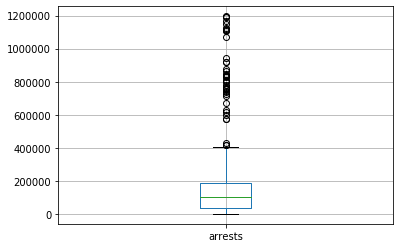

In [27]:
arrest_total_df.boxplot(column=['arrests'])

In [10]:
arrest_year_df = arrest_total_df.groupby(['year']).count().sort_values(['year']) 
arrest_year_df = arrest_year_df.rename(columns={'arrests': 'row_count'})
arrest_year_df

,state,row_count
year,,
2000,48,48
2001,50,50
2002,50,50
2003,50,50
2004,50,50
2005,50,50
2006,50,50
2007,50,50
2008,50,50


## Explore Employment

In [11]:
employment_df = pd.read_csv(EMPLOYMENT_FILE)
employment_df.head()
employment_df.info()

,agency_ct,civilian_ct,year,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,pe_ct_per_1000,population,state_abbr,state_name,total_pe_ct
0,53,1013,2000,631,278,909,382,2371,2753,4.54,806621,DE,Delaware,3662
1,62,1120,2001,694,323,1017,426,2468,2894,4.76,820963,DE,Delaware,3911
2,64,1150,2002,714,338,1052,436,2761,3197,5.06,839193,DE,Delaware,4249
3,60,1257,2003,813,399,1212,444,2625,3069,5.08,843255,DE,Delaware,4281
4,54,1161,2004,697,348,1045,464,2561,3025,4.76,854779,DE,Delaware,4070


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 14 columns):
agency_ct             1102 non-null int64
civilian_ct           1102 non-null int64
year                  1102 non-null int64
female_civilian_ct    1102 non-null int64
female_officer_ct     1102 non-null int64
female_total_ct       1102 non-null int64
male_civilian_ct      1102 non-null int64
male_officer_ct       1102 non-null int64
male_total_ct         1102 non-null int64
pe_ct_per_1000        1102 non-null float64
population            1102 non-null int64
state_abbr            1102 non-null object
state_name            1102 non-null object
total_pe_ct           1102 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 120.6+ KB


In [28]:
population_df = employment_df[['state_abbr', 'year', 'population']]
population_df.head()

,state_abbr,year,population
0,DE,2000,806621
1,DE,2001,820963
2,DE,2002,839193
3,DE,2003,843255
4,DE,2004,854779


In [13]:
population_df.groupby('year').count()

,state_abbr,population
year,,
2000,58,58
2001,58,58
2002,58,58
2003,58,58
2004,58,58
2005,58,58
2006,58,58
2007,58,58
2008,58,58


## Merge DataFrames

In [25]:
merge_1_df = pd.merge(arrest_total_df, population_df, how='inner', 
                      left_on=['state', 'year'], right_on=['state_abbr', 'year'])
merge_1_df.tail(20)
merge_1_df.shape

,state,year,arrests,state_abbr,population
1082,DE,2018,23658,DE,984141
1083,DE,2018,23658,DE,984141
1084,DE,2018,23658,DE,984141
1085,DE,2018,23658,DE,984141
1086,DE,2018,23658,DE,984141
1087,DE,2018,23658,DE,984141
1088,DE,2018,23658,DE,984141
1089,DE,2018,23658,DE,984141
1090,DE,2018,23658,DE,984141
1091,DE,2018,23658,DE,984141


(1102, 5)

In [15]:
merge_2_df = pd.merge(merge_1_df, state_clean_df, how='inner', left_on=['state'], right_on=['state_abbr'])
merge_2_df.head()

,state,year,arrests,state_abbr_x,population,state_abbr_y,state_name,region_code,region_name
0,DE,2000,35689,DE,806621,DE,Delaware,3,South
1,DE,2000,35689,DE,806621,DE,Delaware,3,South
2,DE,2000,35689,DE,806621,DE,Delaware,3,South
3,DE,2000,35689,DE,806621,DE,Delaware,3,South
4,DE,2000,35689,DE,806621,DE,Delaware,3,South


In [16]:
merge_df = merge_2_df[['region_name', 'state', 'year', 'arrests', 'population']]
merge_df.head()
merge_df.shape

,region_name,state,year,arrests,population
0,South,DE,2000,35689,806621
1,South,DE,2000,35689,806621
2,South,DE,2000,35689,806621
3,South,DE,2000,35689,806621
4,South,DE,2000,35689,806621


(1102, 5)

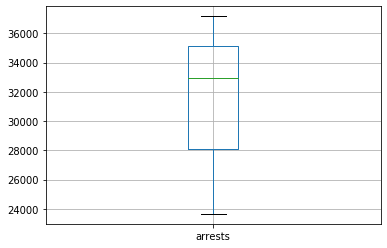

In [17]:
merge_df.boxplot(column=['arrests'])

## Create 3 period Dataframes

In [18]:
merge_df.groupby(['region_name', 'year']).count()[['state']]

state
region_name year       
South       2000  58   
            2001  58   
            2002  58   
            2003  58   
            2004  58   
            2005  58   
            2006  58   
            2007  58   
            2008  58   
            2009  58   
            2010  58   
            2011  58   
            2012  58   
            2013  58   
            2014  58   
            2015  58   
            2016  58   
            2017  58   
            2018  58

In [19]:
period_0405_df = combined_df.loc[combined_df['year'].between(2004, 2005)]
period_0405_df.head()
period_0405_df.shape

NameError: name 'combined_df' is not defined

In [ ]:
period_1112_df = combined_df.loc[combined_df['year'].between(2011, 2012)]
period_1112_df.head()
period_1112_df.shape

In [ ]:
period_1718_df = combined_df.loc[combined_df['year'].between(2017, 2018)]
period_1718_df.head(10)
period_1718_df.shape

In [ ]:
# examine number of counts per region

period_0405_df.groupby(['region_name']).count()[['state', 'year']]
period_1112_df.groupby(['region_name']).count()[['state', 'year']]
period_1718_df.groupby(['region_name']).count()[['state', 'year']]

In [ ]:
save_path = r'data/crime_data_full.csv'
merge_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'